In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [22]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [23]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables


In [24]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [25]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [26]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [30]:
# Inspect columns
columns = inspector.get_columns('measurement')
for column in columns:
     print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [31]:
# Inspect columns
columns = inspector.get_columns('station')
for column in columns:
     print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [33]:
# Display measurement table
pd.read_sql('select * from measurement',engine)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [34]:
# Display station table
pd.read_sql('select * from station',engine)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [58]:
# Find the most recent date in the data set.
recent_precip = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_precip

('2017-08-23')

In [78]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = (dt.datetime.strptime(recent_precip[0], '%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')
#print (year_ago)

# Perform a query to retrieve the data and precipitation scores
precip_query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()
#precip_query

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_query, columns = ['Date', 'Precipitation Score']).set_index("Date")

# Sort the dataframe by date
precip_df = precip_df.sort_values(["Date"])
#precip_df.head()

# Clean Data/Drop NaN values
clean_precip_df = precip_df.dropna(how="any")
clean_precip_df.head()


,Precipitation Score
Date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


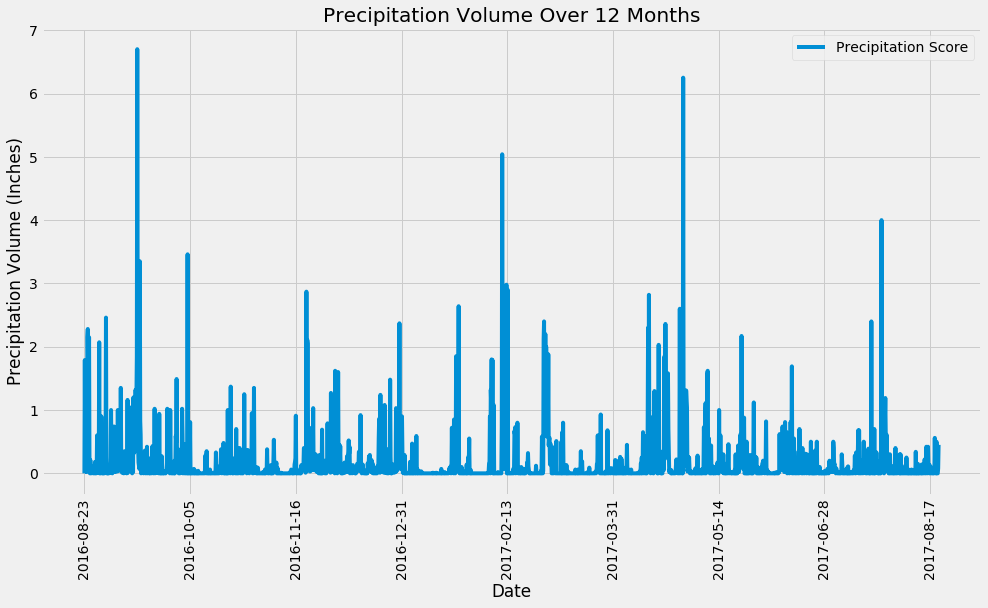

In [83]:
# Use Pandas Plotting with Matplotlib to plot the data
clean_precip_df.plot(rot=90, figsize=(15,8))
plt.ylabel('Precipitation Volume (Inches)')
plt.title("Precipitation Volume Over 12 Months")
plt.show()

In [84]:
# Use Pandas to calcualte the summary statistics for the precipitation data
clean_precip_df.describe()

,Precipitation Score
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset

In [6]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

In [7]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

In [8]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Close Session

In [9]:
# Close Session
session.close()

NameError: name 'session' is not defined